# Homework Assignment 2

Due February 14th at **10am**.  The pre-grading script should be up and running by Friday afternoon and will give you feedback in the **Task 5** item.  A note will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your **mp248** repo as **mp248/Assignment.2/Assignment.2.ipynb**. 


## P1: Quiz 2, extended. 

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a **dictionary**, $L$, where $L[k]$ is the number of times one needs to apply $f$ to turn $k$ into $1$, eg: $L[1]=0$, $L[2]=1$.

Consider the function $T(k) = L[1] + L[2] + \cdots + L[k]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for both (a) a linear and (b) a quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?   Plot the data together with the least-squares interpolation.  Provide a suitable title and legend -- include the coefficients of the least-squares fitting in the legend.

For the purposes of the pre-grading script, print out the values of $T(10)$, $T(100)$, $T(1000)$, $T(10000)$, and $T(100000)$. Put the values in a 5-element list, and print out that list.

**Note**: We will discuss least squares in the Monday Feb. 11th class.

[61, 3117, 59431, 849637, 10753712]


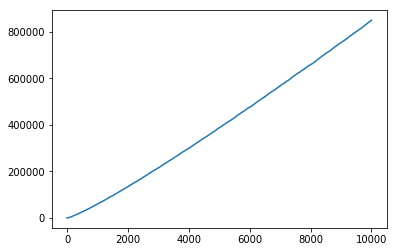

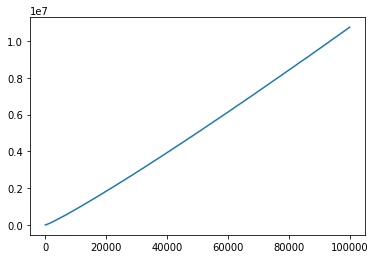

In [103]:
import matplotlib.pyplot as plt

def f(n):
    if(n%2==0):
        return int(n/2)
    if (n%2!=0):
        return 3*n+1
    
def recursive(n,k):
    #print(n, end=" ")
    #print('k = ',k)
    if n==1:
        #print(rec)
        return k
    rec = f(n)
    iterations = recursive(rec, k+1)
    #print('after recursion ',iterations)
    return iterations

def makeDict(n):
    iterations = {}
    for i in range (1,n):
        iv = str(i)
        string = str('L['+iv+']')
        iterations[string] = recursive(i,0)
        #print('when n=', i,', the number of recursive steps until f(x) = 1 is: ',recursive(i,1))
    #print(iterations)
    return iterations
makeDict(1000)

def T(k):
    Dict = makeDict(k)
    #print(Dict)
    T = 0
    for i in range (1,k):
        iv = str(i)
        string = str('L['+iv+']')
        L = Dict[string]
        T = T + L
    return T
List = [T(10),T(100),T(1000),T(10000),T(100000)]
print(List)

def Tplot(k):
    x = [0]*(k-1)
    t = [0]*(k-1)
    Dict = makeDict(k)
    #print(Dict)
    T = 0
    for i in range (1,k):
        iv = str(i)
        string = str('L['+iv+']')
        L = Dict[string]
        T = T + L
        x[i-1]=i
        t[i-1]= T
    plt.plot(x,t)
    plt.show()
    

Tplot(10000)
Tplot(100000)

## P2 : Simple Equation Solver

While Newton's method is an excellent way to solve equations, in practice there is a more reliable way to solve equations, called the **subdivision method**. 

The heart of the subdivision method is the **intermediate value theorem** which states that if a function $f: [a,b] \to \mathbb R$ is *continuous* then for any $y_0$ between $f(a)$ and $f(b)$ (not equal to $f(a)$ or $f(b)$), there exists $t_0 \in (a,b)$ with $f(t_0) = y_0$. This theorem is the inspiration for:

**The Subdivision method** for solving $f(t)=0$. 

Given a continuous function $f : [a,b] \to \mathbb R$ with $f(a)$ and $f(b)$ having opposite signs (in particular, not zero), let $t_0$ be the *mid-point* of the interval $[a,b]$ i.e. $t_0 = \frac{a+b}{2}$.  We know by the intermediate value theorem that $f(t)=0$ has a solution in the interval.  Moreover, if $f(t_0)$ has the same sign as $f(b)$, then by the intermediate value theorem, a solution *must be* in the interval $[a,t_0]$.  Similarly, if $f(t_0)$ has the same sign as $f(a)$, a solution *must be* in the interval $[t_0,b]$. 

The *subdivision method* is to repeat this process of replacing the interval $[a,b]$ by either $[a,t_0]$ or $[t_0,b]$ until your interval is shorter than your acceptable error in approximation. 

**The problem** Write a Python function *subdiv(f,x,a,b,eps)* that takes as input a sympy function $f$ with variable $x$, with left endpoint $a$ and right endpoint $b$. *eps* is your acceptable amount of error.  The function subdiv will iterate the subdivision method until the interval containing a root is shorter than *eps*.  The function will return the endpoints of the interval, together with the number of iterations.  Find the root of $x^x-2$ in the interval $[1,2]$.  Set $eps = \frac{1}{10^k}$ for $k=1,2,3,4,5,6$, printing the output of *subdiv* in each case.

**Hint** When solving for the root of $x^2-2$, using endpoints $1.0$ and $2.0$ with *eps=0.5*, *subdiv* should take only one iteration. Using *eps=1.0* it should take zero.

In [133]:
import sympy as sp
x = sp.Symbol('x')

def subdiv(f,x,a,b,eps):
    F = sp.lambdify(x, f)
    t0 = (a+b)/2
    #print('t0 is:',t0)
    #print(F(t0))
    if(b-a <= eps):
        #print('base case')
        return t0
    if (F(t0)*F(a) < 0):
        #print('changing endpoints to ',a,'and ', t0)
        ans = subdiv(f,x,a,t0,eps)
        return ans
    if (F(t0)*F(b) < 0):
        #print('changing endpoints to ',t0,'and ', b)
        ans = subdiv(f,x,t0,b,eps)
        return ans
    
for k in range (1,7):
    print(subdiv(x**2-2,x,1.,2.,1/10**k))

1.40625
1.41796875
1.41455078125
1.414215087890625
1.4142112731933594
1.4142136573791504


## P3: Extended Newton method example.

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find the points in the plane where Newton's method eventually fails, i.e. find all the initial 
conditions $z_0$ such that $N^{(k)}(z_0) = 0$ for some $k$.  Clearly, Newton's method fails for $z_0 = 0$, with $k=0$, i.e. it fails immediately.  We say Newton's method fails in one step if $N^{(1)}(z_0) = 0$, and two steps if $N^{(2)}(z_0)=0$, etc. 

Plot the points where Newton's method fails in $k$ steps for $k=0,1,2,3,4,\cdots, 10$.  Use a different color for each $k$. 

We denote the set where Newton's method fails in $k$ steps by $F_k$. 

$$F_0 = \{0\}$$

and

$$F_k = \{ z_0 : N(z_0) = \frac{2z_0^3+1}{3z_0^2} \in F_{k-1} \}$$

Thus, provided we know $F_{k-1}$ we can solve for $F_k$, as the solution set to the equation

$$ F_k = \{ z_0 : 2z_0^3+1 = 3f_{k-1}z_0^2, f_{k-1} \in F_{k-1} \}$$

$$F_k = \{ z_0 : 2z_0^3-3f_{k-1}z_0^2+1 = 0, f_{k-1} \in F_{k-1} \}$$

We can solve this equation exactly in closed form using Sympy -- you will likely find this slow. 

More pragmatically, we can solve it using complex floats with the [*mpmath*](http://mpmath.org/doc/current/calculus/polynomials.html) library. 

**Advice** Please use a careful choice of *markersize* in your point plot so that you can see the underlying shape of the scatter plot. i.e. try to avoid big points crowding each other out. Also set *figsize* to (12,12), to ensure your plot is reasonably large.

**Advice** Choose your *xlim* and *ylim* so that your image $x$ and $y$ coordinates vary between $-2$ and $2$. As you will see, there *are* solutions outside of this square, but they are rather rare, and having them in the plot wrecks the scale.

Use **%matplotlib inline** to ensure your plots are saved in your notebook.  

In [143]:
%matplotlib inline

def newtFail(z0,k):
    F = (2*z0**3 + 1)/3*z0**2
    if(F == 0):
        return k
    if(k>100):
        return -1
    return newtFail(F,k+1)


    

0
-1


## P4: Doubling roots

Recall our *doubling function* $f$ from the start of the Sympy notebook (7).   One way to express it is via the floor function $\lfloor x \rfloor$ 

$$f(x) = 2x - \lfloor 2x \rfloor.$$

The floor function $\lfloor x \rfloor$ is the largest integer $k$ with $k \leq x$.  

Using Python and the Sympy library, compute the iterates $f^{(k)}(\sqrt{2})$ for $k=0,1,2,\cdots, 1000$.  By iterates we mean 
$$f^{(0)}(\sqrt{2}) = \sqrt{2}$$
$$f^{(1)}(\sqrt{2}) = f(\sqrt{2})$$
$$f^{(2)}(\sqrt{2}) = f(f(\sqrt{2}))$$ 
$$f^{(3)}(\sqrt{2}) = f(f(f(\sqrt{2})))$$

Verify that $f^{(i)}(\sqrt{2}) \neq f^{(j)}(\sqrt{2})$ if and only if $i = j$.

Using the sort function (**sorted**) linearize the iterates, i.e. compute a sequence $j_0, j_1, \cdots, j_{1000}$ such that

$$f^{(j_0)}(\sqrt{2}) < f^{(j_1)}(\sqrt{2}) < \cdots < f^{(j_{1000})}(\sqrt{2}).$$

Store the sequence $J = (j_0, j_1, \cdots, j_{1000})$ as a list, and print it.

**Note**: If Sympy's implementation of the inequality $<$ fails you, perhaps work around it creatively using *evalf*. 

If you have trouble answering this question for **1000** iterations, as asked, you will get partial credit for a correct answer for **200**, **400**, **600** or **800** iterations, respectively.  You will receive more partial credit the closer you are to **1000** points. But please do not answer this question for any other number of iterations as the pre-grading script will not look for that answer.   As a sanity check, note that any answer to this problem for **1000** iterations should be a list with **1001** elements.

In [ ]:
def doubleRoots(x,k):
    return 
